# BEES3041: Modelling the photosynthetic response to environmental conditions

![](data/logo.jpeg)

# Introduction

In this lab we are going to explore the C~3~ leaf-level photosynthesis model proposed by @Far80 and use this to simulate photosynthesis at leaf, ecosystem and global scales. The model is central to all land schemes embedded in coupled-climate models and predicts that photosynthesis is limited by the slowest of three biochemical processes: 

  1. The maximum rate of Rubisco-catalysed carboxylation
  2. The rate of ribulose 1,5-bisphosphate (RuBP) regeneration via electron transport 
  3. The rate of RuBP regeneration via triose phosphate utilisation 

In this practical we are only going to consider the first two limitations. There a number of great papers which cover this subject in detail, see for example, @Ber13, @Med02 and @Sha85.

We are going to use the photosynthesis model to:

* learn how leaf-level photosynthesis responds to changes in the environmental forcing (photosynthetically active radiation, temperature and carbon dioxide).
* simulate GPP at the ecosystem-scale (~1 km^2) using FLUXNET (eddy covariance) meteorological data.
* build a simpler GPP model and apply this at the ecosystem scale.

From playing with these model we should start to see the key assumptions that our models make. We should also begin to identify the key weakness in our approach as we apply the model at different scales. We should also start to build an understanding that would allow us to predict how vegetation will respond to global change.

***

# Temperature responses of model parameters

Let's start by exploring the response of the model to temperature. First we need to generate some temperature data:

In [1]:
#%matplotlib notebook
%matplotlib inline

import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("python")
from farq import FarquharC3
import constants as c
import parameters as p

In [2]:
Tleaf = np.arange(0, 50.0+1.0) 
TleafK = Tleaf + c.DEG_2_KELVIN

In [3]:
print(Tleaf)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]


The photosynthesis model has two major parameters, the potential rate of electron transport (Jmax) and the maximum rate of Rubisco activity (Vcmax). Both of these parameters vary as a function of temperature, let's plot them. I've copied the function calls from farq.py:

In [4]:
F = FarquharC3(peaked_Jmax=True, peaked_Vcmax=True, gs_model="medlyn")

In [5]:
Vcmax = F.peaked_arrh(p.Vcmax25, p.Eav, TleafK, p.deltaSv, p.Hdv)
Jmax = F.peaked_arrh(p.Jmax25, p.Eaj, TleafK, p.deltaSj, p.Hdj)

Text(0.5, 0, 'Temperature ($^{\\circ}$C)')

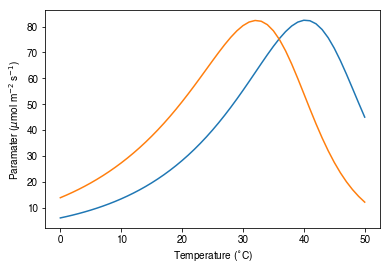

In [6]:
plt.plot(Tleaf, Vcmax)
plt.plot(Tleaf, Jmax)
plt.ylabel("Paramater ($\mu$mol m$^{-2}$ s$^{-1}$)")
plt.xlabel("Temperature ($^{\circ}$C)")

In the model both parameters are modelled using a peaked form of the Arrhenius equation. The Eav/Eaj parameters give the exponential increase of the function below the optimum; the Hdv/Hdj parameters describe the rate of decrease of the function above the optimum. 

**Q. Can you work out what parameter values you used?**

Answer:

In [7]:
print(p.Vcmax25, p.Eav, p.deltaSv, p.Hdv)
print(p.Jmax25, p.Eaj, p.deltaSj, p.Hdj)

40.0 51560.0 629.26 200000.0
66.8 43790.0 644.4338 200000.0


**Q. Can you now tweak these values and explore how the functions respond to temperature?**

Answer: 

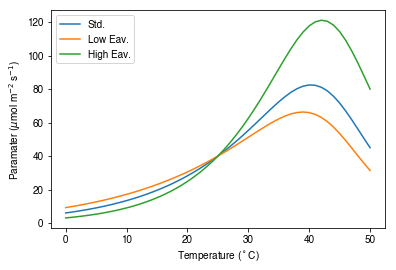

In [8]:
Vcmax2 = F.peaked_arrh(p.Vcmax25, 40000., TleafK, p.deltaSv, p.Hdv)
Vcmax3 = F.peaked_arrh(p.Vcmax25, 70000., TleafK, p.deltaSv, p.Hdv)

plt.plot(Tleaf, Vcmax, label="Std.")
plt.plot(Tleaf, Vcmax2, label="Low Eav.")
plt.plot(Tleaf, Vcmax3, label="High Eav.")
plt.legend(numpoints=1, loc="best")
plt.ylabel("Paramater ($\mu$mol m$^{-2}$ s$^{-1}$)")
plt.xlabel("Temperature ($^\circ$C)")
plt.show()

In the model, the Rubisco-limited photosynthesis rate is made up of five parameters: 

  1. $\Gamma$$^{*}$: the CO~2~ compensation point in the absence of mitochondrial respiration.
  2. V~cmax~: the maximum rate of Rubisco activity.
  3. R~d~: leaf mitochondrial respiration in the light (day respiration).
  4. K~o~: Michaelis– Menten coefficients for oxygenation.
  5. K~c~: Michaelis– Menten coefficients for carboxylation.
  
Each of these parameters is temperature dependent, thus the skill of the model depends on correctly accounting for these response to temperature when using the model. When we use these model parameters in global models we typical assume that the parameters (excluding V~cmax~) are conserved across species. This assumption is broadly supported by observations.

**Q. What do we think happens in different growing conditions?**

By contrast, leaf measurements suggest that V~cmax~ varies considerably: varying between leaves within a single plant, across growing seasons and across plants. In global models, we typically assume that we can represent this variability using 5-11 plant functional types, see @Rog14 for more details. Even when we do this in models, the disagreement across models is striking.

![](data/rogers.png)




**Q. What impact do you think this variability will have on model simulations of GPP?**

**Q. Now that you've seen how to call the functions to calculate V~cmax~ and J~max~, can you look in the code (python/farq.py) and also plot $\Gamma$$^{*}$, R~d~m, K~o~ and K~m~ as a function of temperature?**
  
***

# Response to temperature

**Q. From your new understanding of how the key model parameters change with temperature, can you predict how the rate of photosynthesis is likely to change with temperature?**

**Q. Can you make a plot to see if your prediction matched the models? (hint ... You will need to call the calc_photosynthesis function)**

Answer:

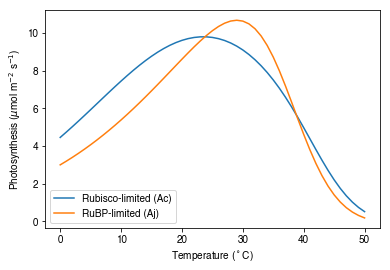

In [9]:
PAR = 1800.0
Cs = 400.0
vpd = 1.5

(An, Ac, Aj, gsw, Rd) = F.photosynthesis(p, Cs, TleafK, PAR, vpd)

plt.plot(Tleaf, Ac-Rd, label="Rubisco-limited (Ac)")
plt.plot(Tleaf, Aj-Rd, label="RuBP-limited (Aj)")
plt.legend(numpoints=1, loc="best")
plt.ylabel("Photosynthesis ($\mu$mol m$^{-2}$ s$^{-1}$)")
plt.xlabel("Temperature ($^\circ$C)")
plt.show()

The plot shows the response of A to temperature increases steadily until it reaches an optimum point (T~opt~), after which A declines at a faster rate.

The model assumes that the Rubisco-limited assimilation rate follows a Michaelis–Menten response function, accounting for a competitive inhibitor, oxygen. With Michaelis-Menten reactions: (i) increasing the limiting substrate, CO~2~; (ii) the amount of enzyme present, Rubisco; and/or (iii) decreasing the competitive inhibitor, O~2~, will yield higher reaction rates. The model also assumes that the RuBP regeneration-limited rate of assimilation depends on the rate at which the light reactions generate ATP and NADPH; this process is limited at low light intensity.

**Q. Can you increase and decrease the intercellular concentration of the O~2~ parameter (O~i~) and plot the impact. Does your plot fit with what I wrote above?**

**Q. Can you figure out how to test the other factors?**

Answer:

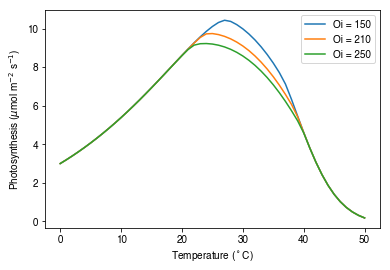

In [10]:
p.Oi = 150.0
(An_low, __, __, __, __) = F.photosynthesis(p, Cs, TleafK, PAR, vpd)

p.Oi = 250.0
(An_high, __, __, __, __) = F.photosynthesis(p, Cs, TleafK, PAR, vpd)

p.Oi = 210.0
(An_std, __, __, __, __) = F.photosynthesis(p, Cs, TleafK, PAR, vpd)

plt.plot(Tleaf, An_low, label="Oi = 150")
plt.plot(Tleaf, An_std, label="Oi = 210")
plt.plot(Tleaf, An_high, label="Oi = 250")
plt.legend(numpoints=1, loc="best")
plt.ylabel("Photosynthesis ($\mu$mol m$^{-2}$ s$^{-1}$)")
plt.xlabel("Temperature ($^\circ$C)")
plt.show()

***

## Response to PAR

At low PAR, A is RUBP regeneration-limited due to the low rates of electron transport. The slope of the inital portion of the A/PAR curve is referred to as the quantum efficieicy of CO~2~ assimilation (see alpha parameter). As light increases, the rapid increase of A with PAR begins to diminsh. The rate this occurs at depends on what we assumed for the curvuture parameter (theta_J).

**Q. Can you vary PAR and plot the response of A (hint ... see how you made an array of temperature)?**

**Q. Can you explore the sensitivity of the A-PAR relationship to alpha and theta_J parameters?**

Answer:

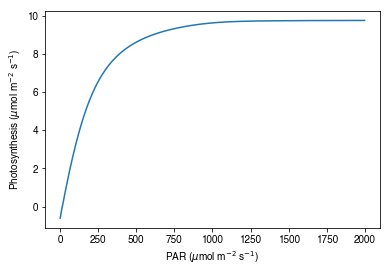

In [11]:
TleafK = 25.0 + c.DEG_2_KELVIN
PAR = np.arange(0.0, 2000.0)
Cs = 400.
vpd = 1.5

(An, Ac, Aj, gsw, Rd) = F.photosynthesis(p, Cs, TleafK, PAR, vpd)

plt.plot(PAR, An, label="An")
plt.ylabel("Photosynthesis ($\mu$mol m$^{-2}$ s$^{-1}$)")
plt.xlabel("PAR ($\mu$mol m$^{-2}$ s$^{-1}$)")
plt.show()

***

## Response to CO~2~

At low [CO~2~] concentrations, photosynthesis is Rubisco-limited except for when PAR is also low. With inceasing [CO~2~], A increases until an inflection point is reached where A is said to be co-limited by Rubisco and RuBP regeneration.

**Q. Can you vary [CO~2~] and plot the response of A?**

Answer:

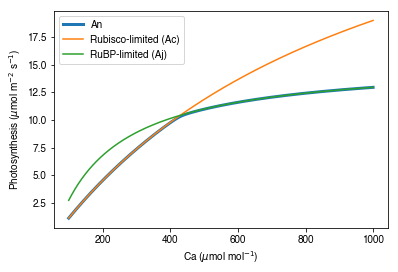

In [18]:
TleafK = 25.0 + c.DEG_2_KELVIN
PAR = 1800.0
Cs = np.arange(100., 1000.0, 0.5)
vpd = 1.5

(An, Ac, Aj, gsw, Rd) = F.photosynthesis(p, Cs, TleafK, PAR, vpd)

plt.plot(Cs, An, label="An", lw=3)
plt.plot(Cs, Ac-Rd, label="Rubisco-limited (Ac)")
plt.plot(Cs, Aj-Rd, label="RuBP-limited (Aj)")
plt.legend(numpoints=1, loc="best")
plt.ylabel("Photosynthesis ($\mu$mol m$^{-2}$ s$^{-1}$)")
plt.xlabel("Ca ($\mu$mol mol$^{-1}$)")
plt.show()